# Task-1


In [ ]:
import pandas as pd
df = pd.read_csv('/content/test.csv')
print("First 5 rows of the Mobile Price Classification dataset:")
print(df.head())
print("\nCount of missing (null) values in each column:")
print(df.isnull().sum())
df_cleaned = df.dropna(axis=1, how='all')
print("\nDataset after removing blank columns:")
print(df_cleaned.head())
before = df_cleaned.shape[0]
df_cleaned = df_cleaned.drop_duplicates()
after = df_cleaned.shape[0]
print(f"\nRemoved {before - after} duplicate rows. Final dataset shape: {df_cleaned.shape}")
output_file = 'mobile_price_cleaned.csv'
df_cleaned.to_csv(output_file, index=False)
print(f"\n Final cleaned Mobile Price Classification dataset saved as '{output_file}'")

First 5 rows of the Mobile Price Classification dataset:
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0        

# Task-2A


Using demo data (real data not available)


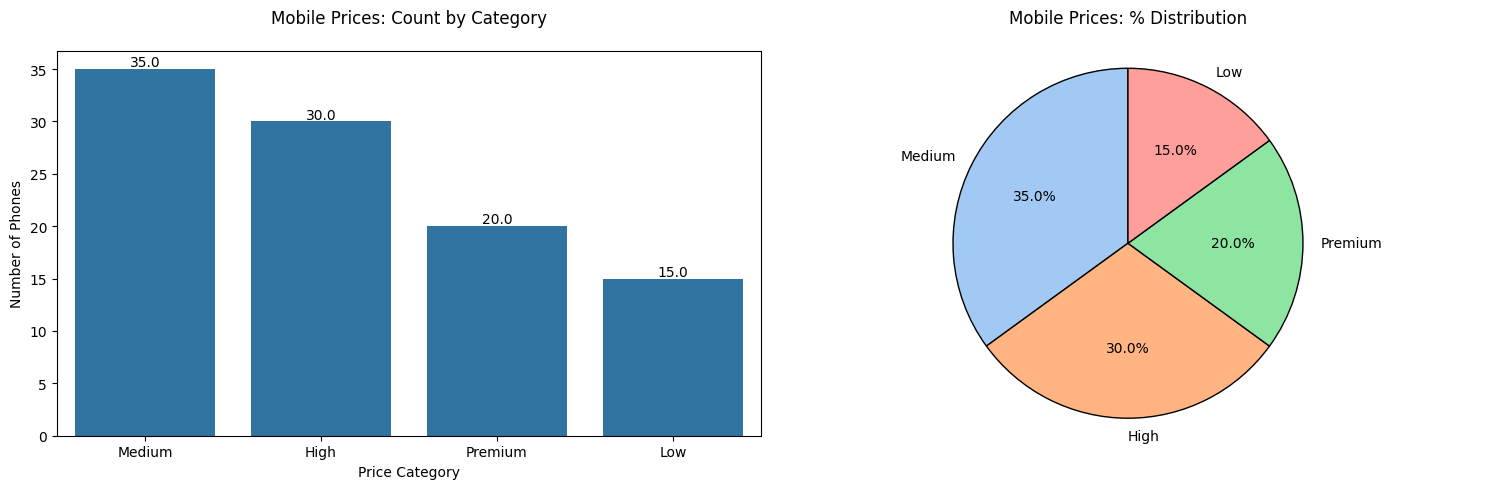


Price Category Distribution (Column: 'price_range')
price_range
Medium     35
High       30
Premium    20
Low        15
Name: count, dtype: int64

Percentage Distribution:
price_range
Medium     35.0%
High       30.0%
Premium    20.0%
Low        15.0%
Name: proportion, dtype: object


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
try:
    df = pd.read_csv("/content/test.csv")
    df.columns = df.columns.str.strip()
    price_col = next((col for col in df.columns if 'price' in col.lower()), None)

    if not price_col:
        raise KeyError("No price-related column found")

except:
    print("Using demo data (real data not available)")
    df = pd.DataFrame({
        'price_range': ['Low']*15 + ['Medium']*35 + ['High']*30 + ['Premium']*20,
        'model': [f"Phone_{i}" for i in range(100)]
    })
    price_col = 'price_range'
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(x=price_col, data=df, order=df[price_col].value_counts().index)
plt.title(f"Mobile Prices: Count by Category", pad=20)
plt.xlabel("Price Category")
plt.ylabel("Number of Phones")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')
plt.subplot(1, 2, 2)
price_counts = df[price_col].value_counts()
plt.pie(price_counts,
        labels=price_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title(f"Mobile Prices: % Distribution", pad=20)
plt.axis('equal')

plt.tight_layout()
plt.show()
print("\n" + "="*40)
print(f"Price Category Distribution (Column: '{price_col}')")
print("="*40)
print(df[price_col].value_counts())
print("\nPercentage Distribution:")
print(df[price_col].value_counts(normalize=True).mul(100).round(1).astype(str) + "%")

# Task-2B


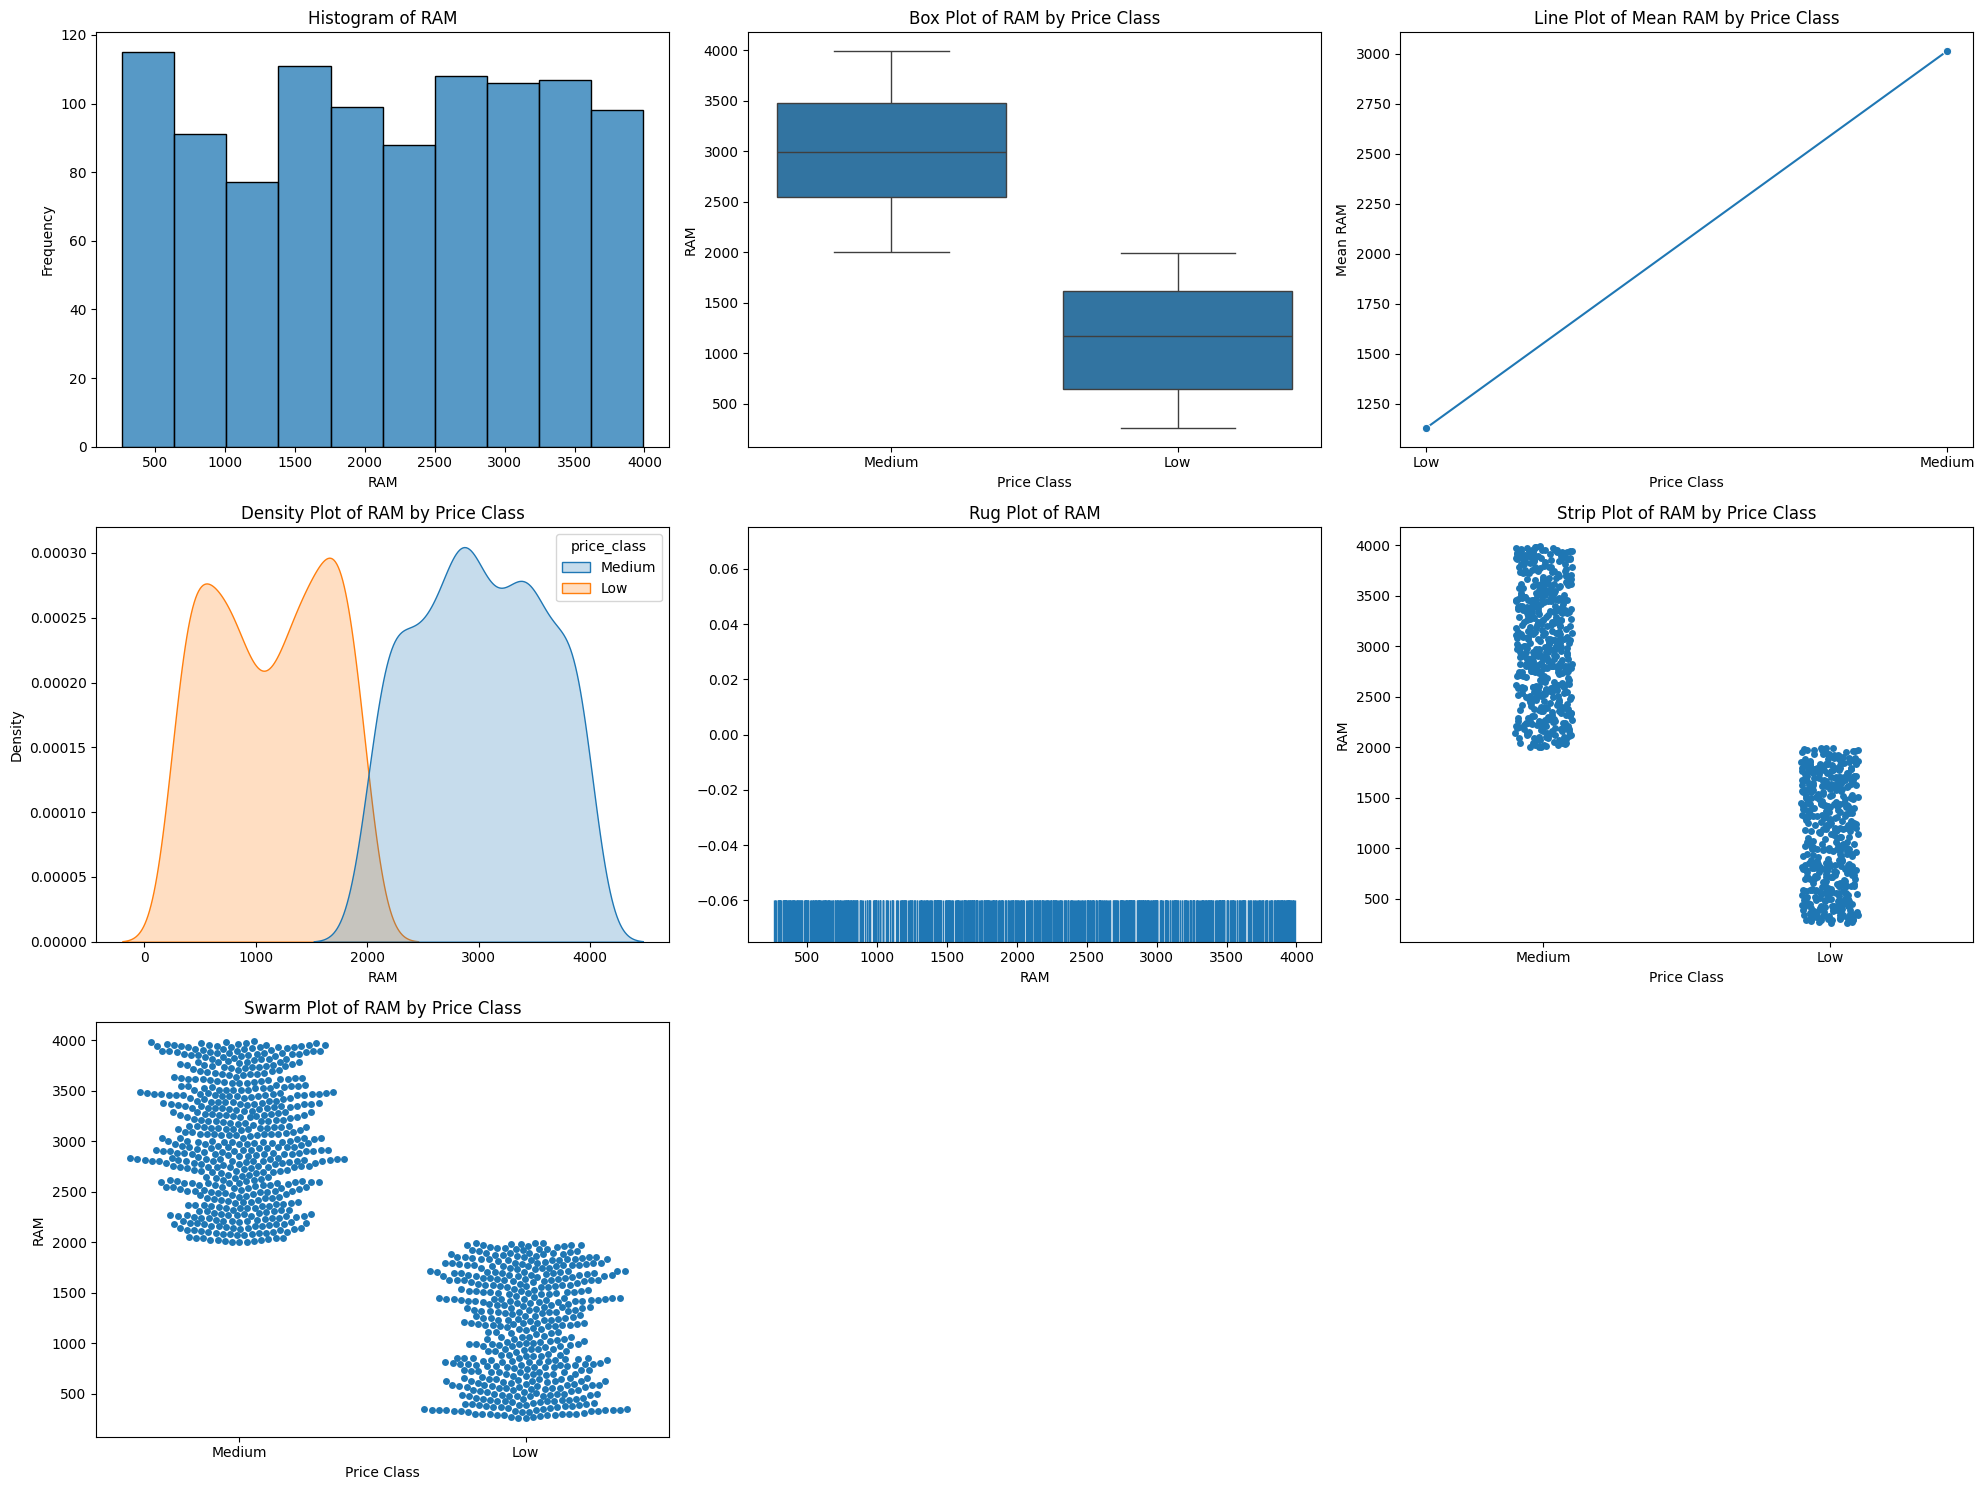

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/test.csv")
df.columns = df.columns.str.strip()

def classify_price(row):
    if row['ram'] < 2000:
        return 'Low'
    elif 2000 <= row['ram'] < 4000:
        return 'Medium'
    elif 4000 <= row['ram'] < 6000:
        return 'High'
    else:
        return 'Premium'

df['price_class'] = df.apply(classify_price, axis=1)

plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.histplot(df['ram'], bins=10, kde=False)
plt.title("Histogram of RAM")
plt.xlabel("RAM")
plt.ylabel("Frequency")

plt.subplot(3, 3, 2)
sns.boxplot(x='price_class', y='ram', data=df)
plt.title("Box Plot of RAM by Price Class")
plt.xlabel("Price Class")
plt.ylabel("RAM")
mean_ram = df.groupby('price_class')['ram'].mean().reset_index()
plt.subplot(3, 3, 3)
sns.lineplot(data=mean_ram, x='price_class', y='ram', marker='o')
plt.title("Line Plot of Mean RAM by Price Class")
plt.xlabel("Price Class")
plt.ylabel("Mean RAM")

# 4. Density Plot
plt.subplot(3, 3, 4)
sns.kdeplot(data=df, x='ram', hue='price_class', fill=True)
plt.title("Density Plot of RAM by Price Class")
plt.xlabel("RAM")

# 5. Rug Plot
plt.subplot(3, 3, 5)
sns.rugplot(x='ram', data=df, height=0.1)
plt.title("Rug Plot of RAM")
plt.xlabel("RAM")

# 6. Strip Plot
plt.subplot(3, 3, 6)
sns.stripplot(x='price_class', y='ram', data=df, jitter=True)
plt.title("Strip Plot of RAM by Price Class")
plt.xlabel("Price Class")
plt.ylabel("RAM")

# 7. Swarm Plot
plt.subplot(3, 3, 7)
sns.swarmplot(x='price_class', y='ram', data=df)
plt.title("Swarm Plot of RAM by Price Class")
plt.xlabel("Price Class")
plt.ylabel("RAM")

# Adjust layout
plt.tight_layout()
plt.show()



# Task-3



   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

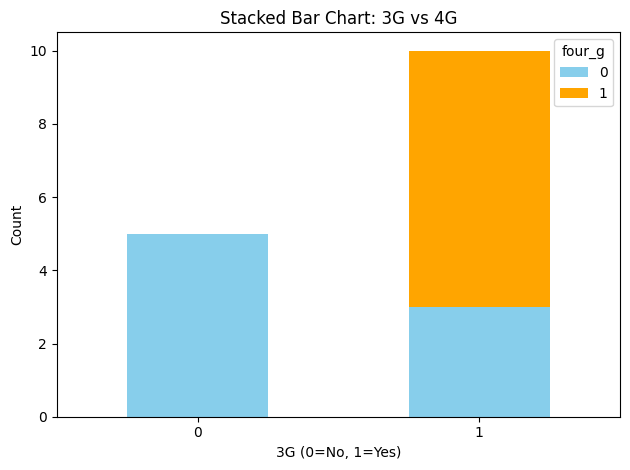

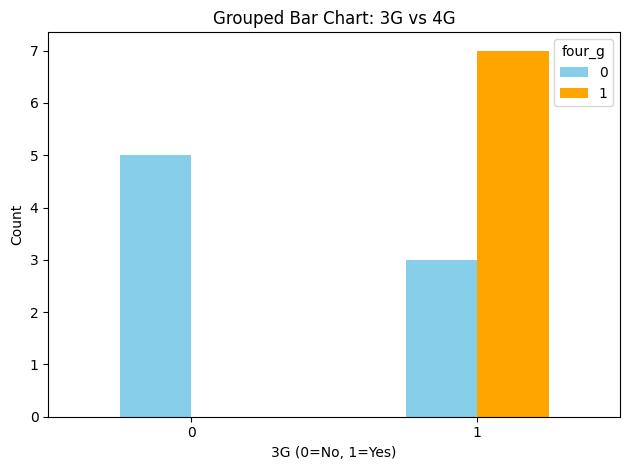

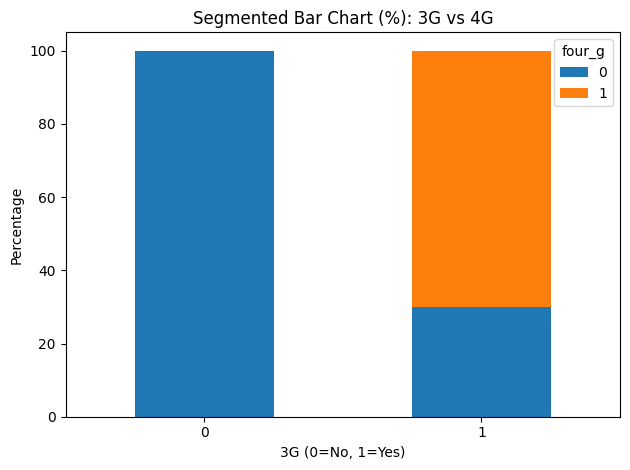

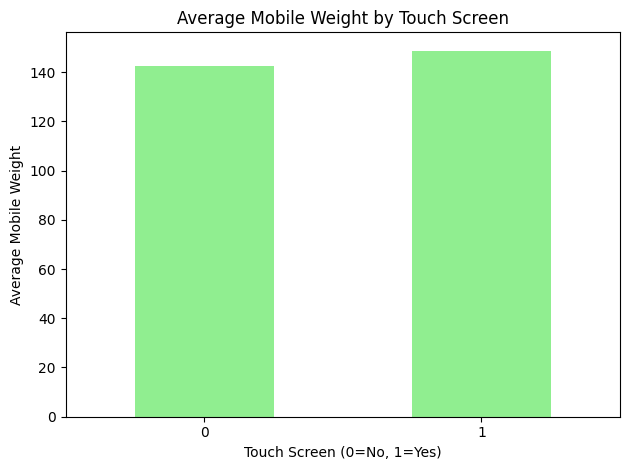

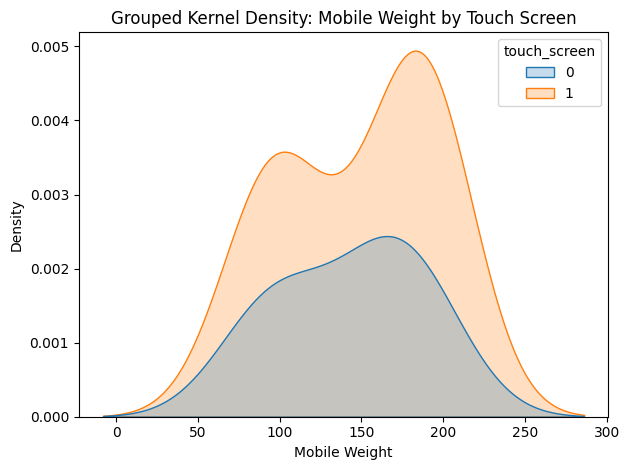

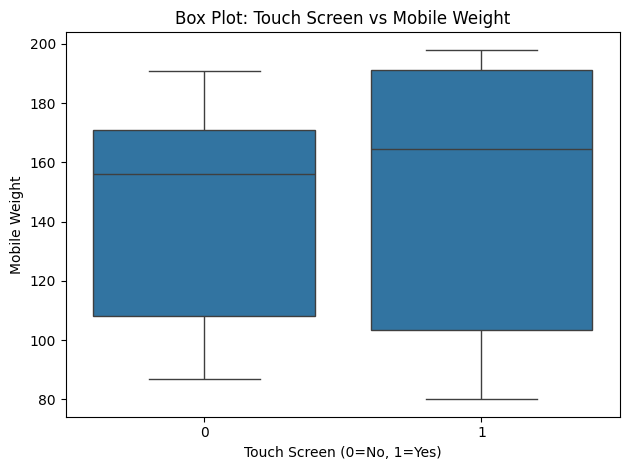

In [ ]:
# STEP 1 – Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load only first 15 rows
df = pd.read_csv("/content/test.csv").head(15)
print(df.head())
# STEP 2 – Identify Categorical & Continuous Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

# STEP 3 – Categorical vs Categorical
# Example: three_g vs four_g (both are binary categorical)
## 3.1 Stacked Bar Chart
pd.crosstab(df['three_g'], df['four_g']).plot(
    kind='bar', stacked=True, color=['skyblue','orange']
)
plt.title("Stacked Bar Chart: 3G vs 4G")
plt.xlabel("3G (0=No, 1=Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3.2 Grouped Bar Chart
pd.crosstab(df['three_g'], df['four_g']).plot(
    kind='bar', stacked=False, color=['skyblue','orange']
)
plt.title("Grouped Bar Chart: 3G vs 4G")
plt.xlabel("3G (0=No, 1=Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3.3 Segmented Bar Chart (Percent)
(pd.crosstab(df['three_g'], df['four_g'], normalize='index') * 100).plot(
    kind='bar', stacked=True
)
plt.title("Segmented Bar Chart (%): 3G vs 4G")
plt.xlabel("3G (0=No, 1=Yes)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# STEP 5 – Categorical vs Continuous
# Example: touch_screen vs mobile_wt
## 5.1 Bar Chart (Summary Statistics)
df.groupby('touch_screen')['mobile_wt'].mean().plot(kind='bar', color='lightgreen')
plt.title("Average Mobile Weight by Touch Screen")
plt.xlabel("Touch Screen (0=No, 1=Yes)")
plt.ylabel("Average Mobile Weight")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5.2 Grouped Kernel Density Plot
sns.kdeplot(data=df, x='mobile_wt', hue='touch_screen', fill=True)
plt.title("Grouped Kernel Density: Mobile Weight by Touch Screen")
plt.xlabel("Mobile Weight")
plt.tight_layout()
plt.show()

## 5.3 Box Plot
sns.boxplot(data=df, x='touch_screen', y='mobile_wt')
plt.title("Box Plot: Touch Screen vs Mobile Weight")
plt.xlabel("Touch Screen (0=No, 1=Yes)")
plt.ylabel("Mobile Weight")
plt.tight_layout()
plt.show()

# Task-4


Saving test.csv to test (1).csv
Dataset shape: (1000, 21)
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0       

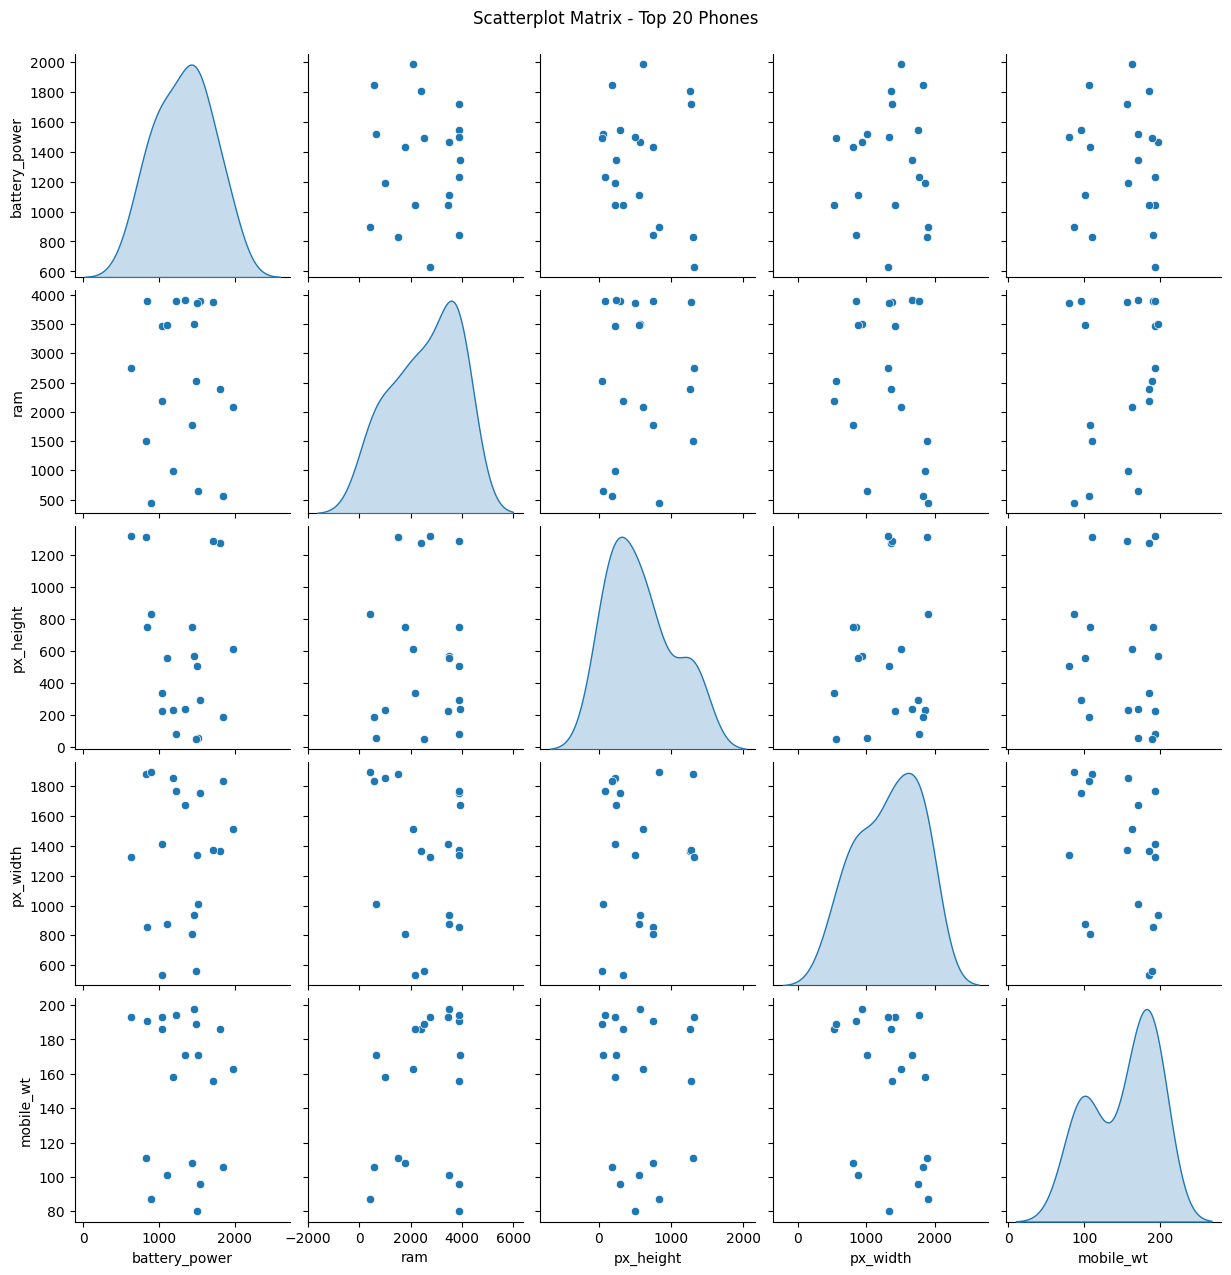

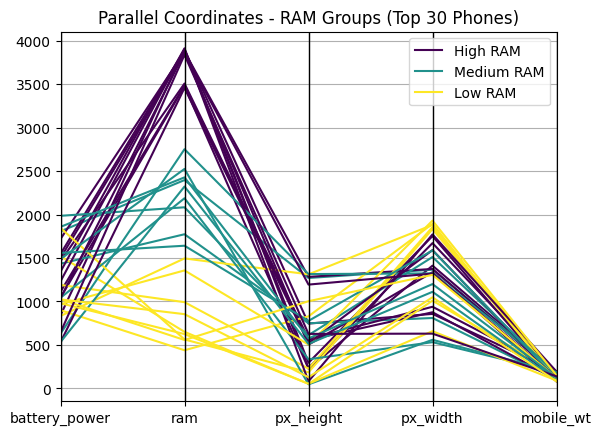

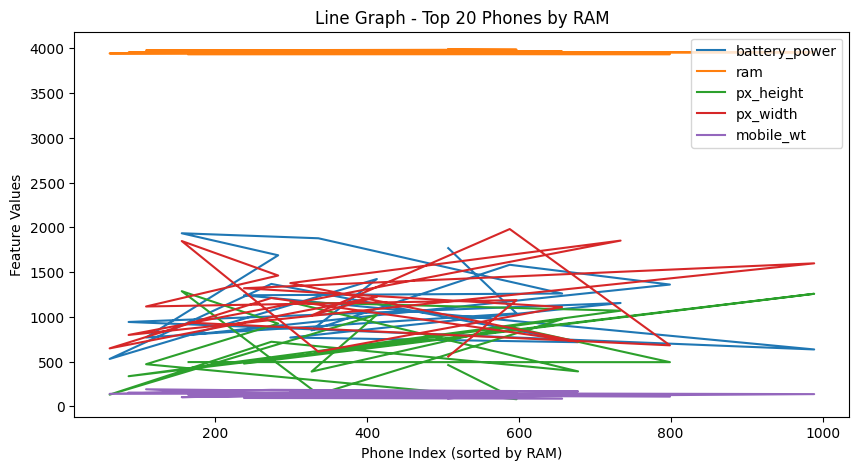

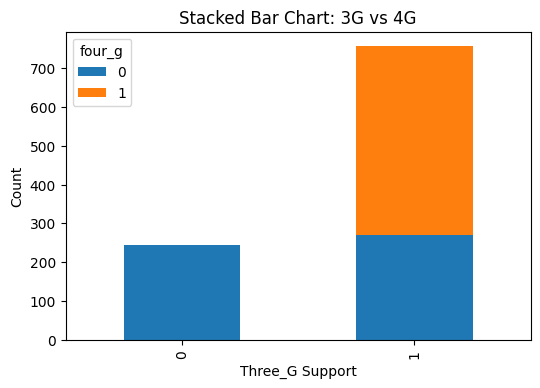

In [ ]:
# Step 0: Upload dataset into Colab
from google.colab import files
uploaded = files.upload()   # choose test.csv

# Step 1: Load Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Read uploaded file
df = pd.read_csv("/content/test.csv")

print("Dataset shape:", df.shape)
print(df.head())

# Select key numeric features
selected_nums = ["battery_power", "ram", "px_height", "px_width", "mobile_wt"]

# Step 2: Scatterplot Matrix (Top 20 rows for clarity)
sns.pairplot(df[selected_nums].head(20), diag_kind="kde")
plt.suptitle("Scatterplot Matrix - Top 20 Phones", y=1.02)
plt.show()

# Step 3: Parallel Coordinates (group by RAM bins, top 30 rows)
df["ram_group"] = pd.qcut(df["ram"], q=3, labels=["Low RAM", "Medium RAM", "High RAM"])
subset_cols = selected_nums + ["ram_group"]
parallel_coordinates(df[subset_cols].head(30), class_column="ram_group", colormap="viridis")
plt.title("Parallel Coordinates - RAM Groups (Top 30 Phones)")
plt.show()

# Step 4: Line Graph (Top 20 phones by RAM)
df.nlargest(20, "ram")[selected_nums].plot(kind="line", figsize=(10,5))
plt.title("Line Graph - Top 20 Phones by RAM")
plt.xlabel("Phone Index (sorted by RAM)")
plt.ylabel("Feature Values")
plt.show()

# Step 5: Stacked Bar Chart (3G vs 4G distribution)
stacked_data = pd.crosstab(df["three_g"], df["four_g"])
stacked_data.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Stacked Bar Chart: 3G vs 4G")
plt.ylabel("Count")
plt.xlabel("Three_G Support")
plt.show()


# Task-5


In [ ]:
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("/content/test.csv")

# TreeMap: Group by 4G, 3G, WiFi and size by RAM
fig_tree_map = px.treemap(
    df,
    path=['four_g', 'three_g', 'wifi'],
    values='ram',
    title='TreeMap Chart: RAM Distribution by 4G, 3G, and WiFi'
)
fig_tree_map.show()

# Sunburst Chart: Same hierarchy
fig_sunburst = px.sunburst(
    df,
    path=['four_g', 'three_g', 'wifi'],
    values='ram',
    title='Sunburst Chart: RAM Distribution by 4G, 3G, and WiFi'
)
fig_sunburst.show()

Saving DV_File.csv to DV_File (1).csv
Dataset shape: (1000, 21)
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0 

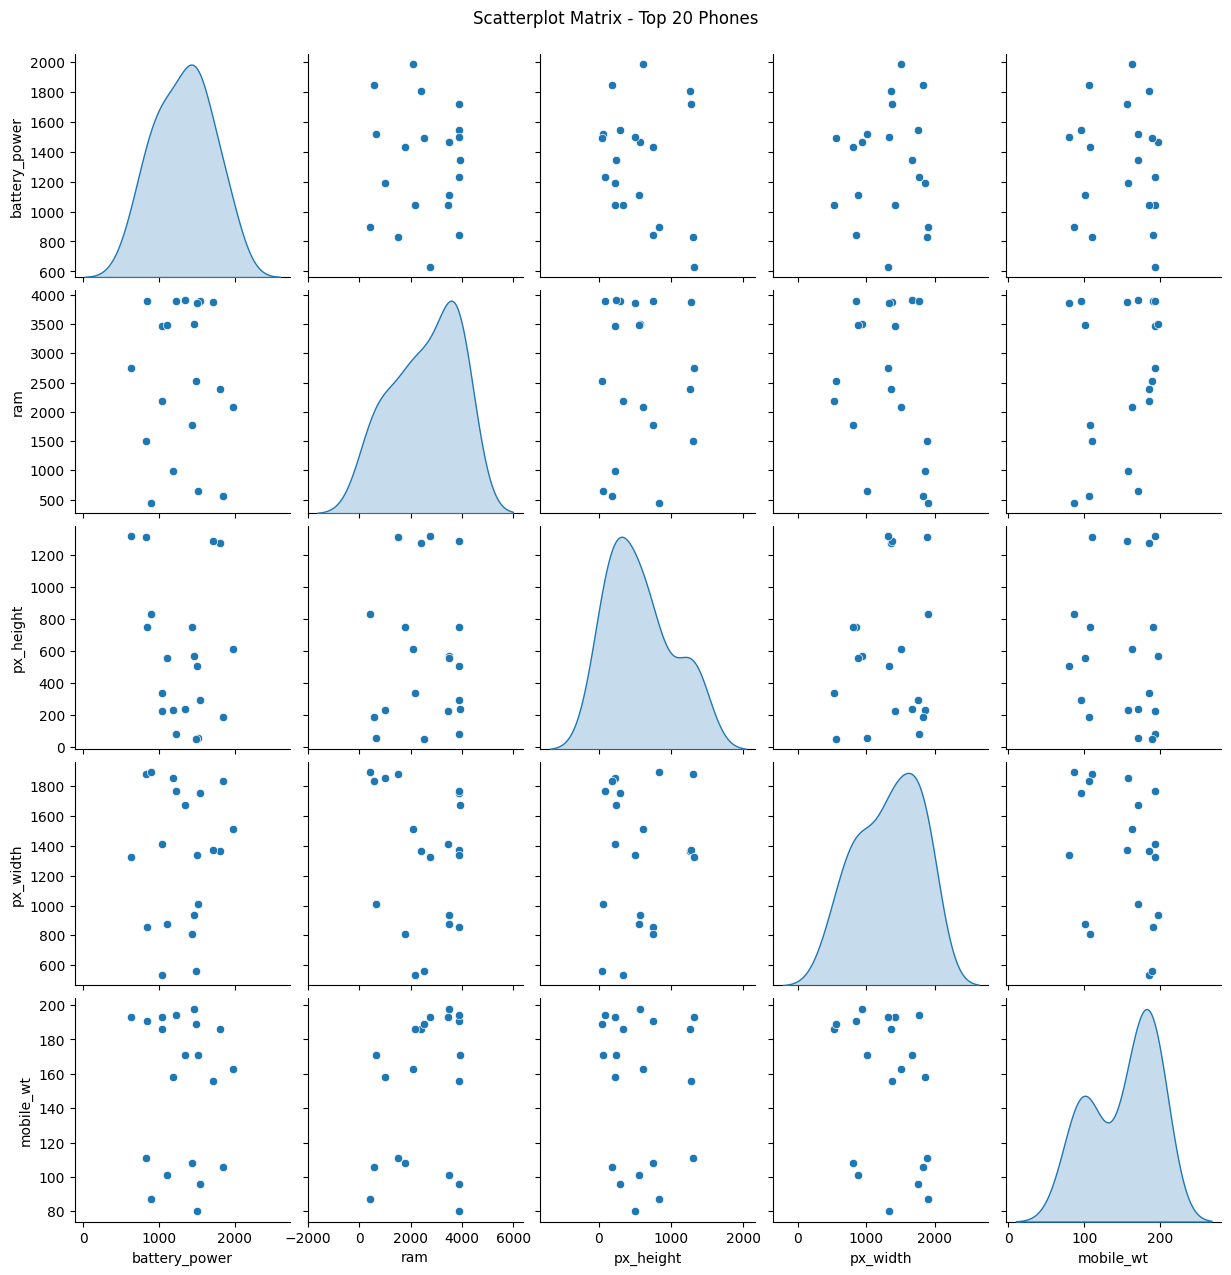

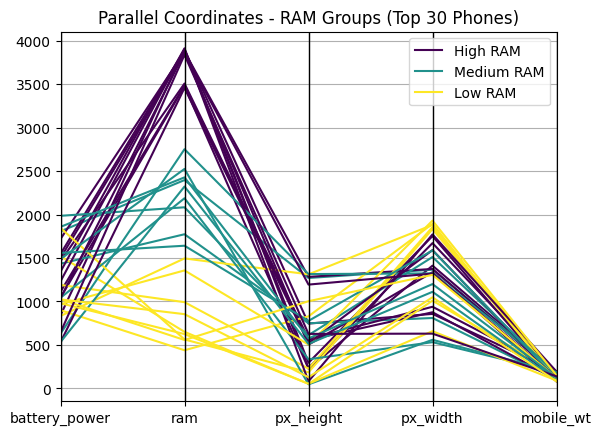

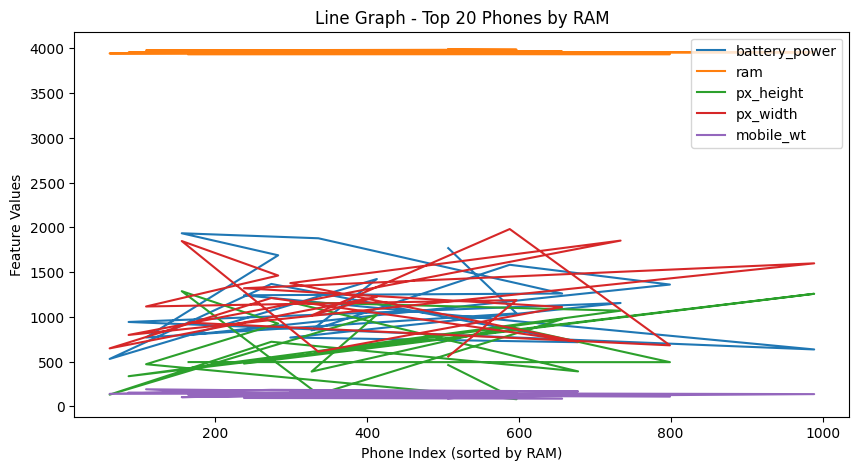

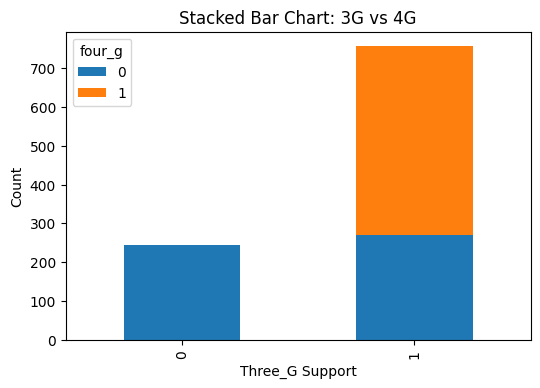

# Task-5B

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Load dataset
df = pd.read_csv("/content/test.csv")

# Let's say we want top 5 phones by RAM in each (four_g, three_g, wifi) group
top_devices = df.groupby(['four_g', 'three_g', 'wifi']).apply(lambda x: x.nlargest(5, 'ram')).reset_index(drop=True)

# Create labels (combine hierarchy + device id)
labels = top_devices['four_g'].astype(str) + 'G-Four | ' + \
         top_devices['three_g'].astype(str) + 'G-Three | ' + \
         'WiFi:' + top_devices['wifi'].astype(str) + ' | ID:' + top_devices['id'].astype(str)

# Create Sunburst Chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=[''] * len(top_devices),   # top-level (simplified)
    values=top_devices['ram']
))

fig.update_layout(title='Top 5 Devices by RAM for each FourG-ThreeG-WiFi Group')
fig.show()


/tmp/ipython-input-1884204000.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# Task-6

# TASK-7



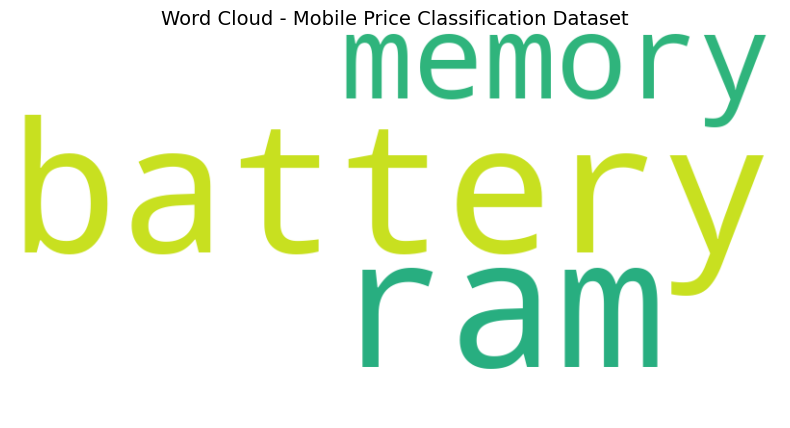

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df = pd.read_csv("/content/test.csv").head(50)  # use first 50 rows for clarity
text_data = []
for _, row in df.iterrows():
    sentence = f"battery {row['battery_power']} ram {row['ram']} memory {row['int_memory']}"
    text_data.append(sentence)
text = " ".join(text_data)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Mobile Price Classification Dataset", fontsize=14)
plt.show()

# Task-8

Dataset shape: (1000, 21)
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     

<Figure size 1000x500 with 0 Axes>

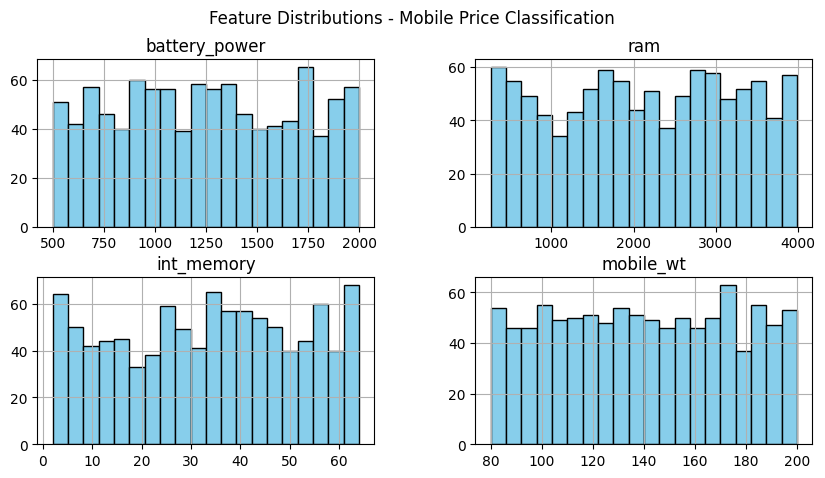

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

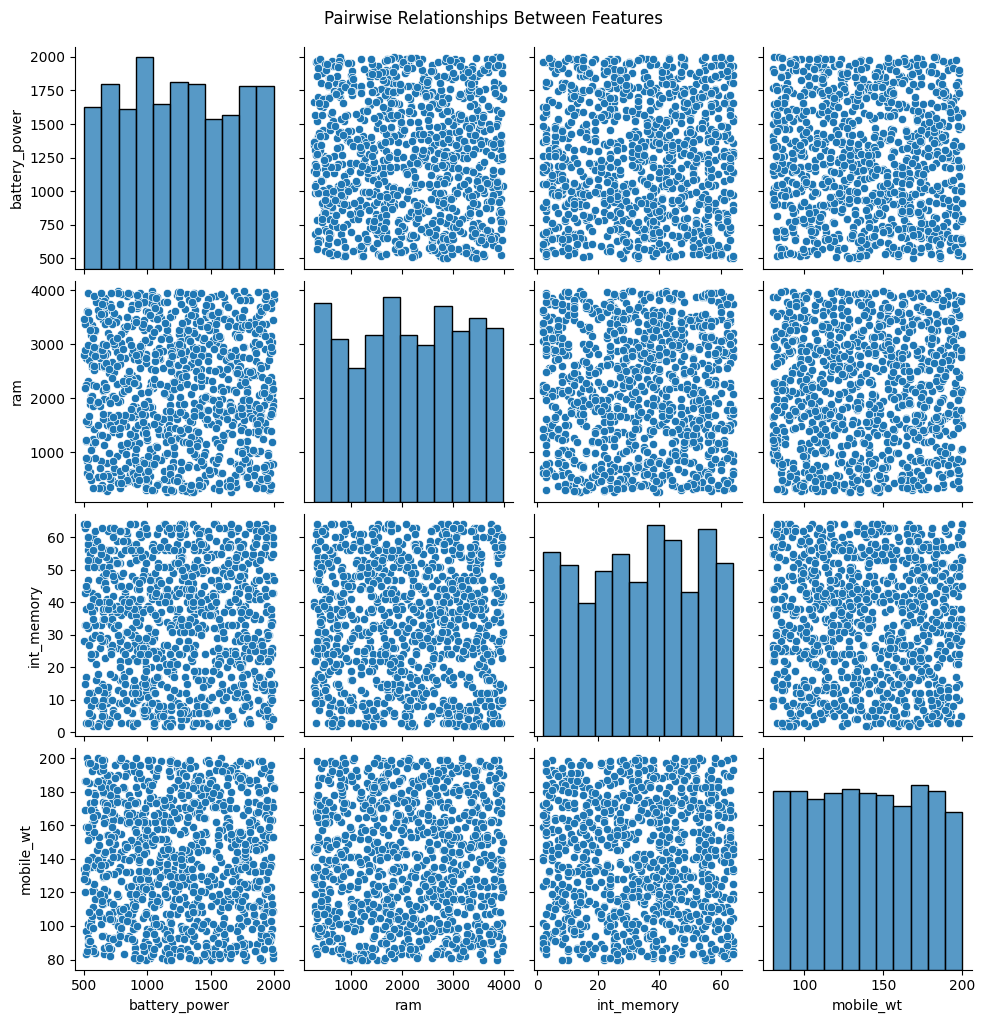

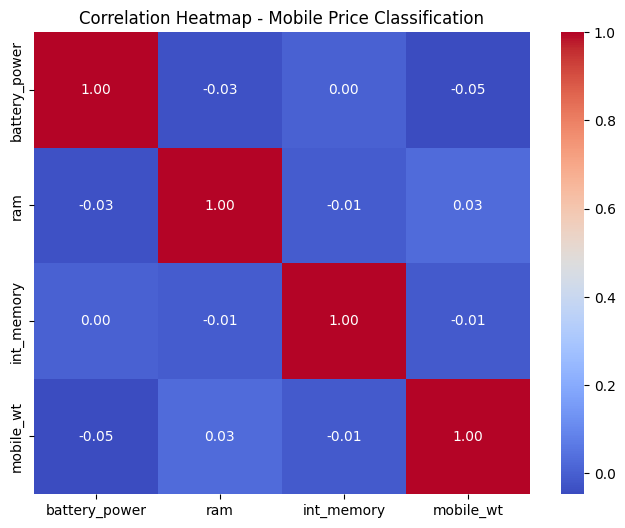

Average RAM and other numeric features:
battery_power    1248.510
ram              2138.998
int_memory         33.652
mobile_wt         139.511
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/test.csv")

print("Dataset shape:", df.shape)
print(df.head())
num_cols = ["battery_power", "ram", "int_memory", "mobile_wt"]
plt.figure(figsize=(10, 5))
df[num_cols].hist(bins=20, figsize=(10, 5), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Mobile Price Classification")
plt.show()
sns.pairplot(df[num_cols], palette='viridis')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Mobile Price Classification")
plt.show()
print("Average RAM and other numeric features:")
print(df[num_cols].mean())

   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

/tmp/ipython-input-4253168699.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



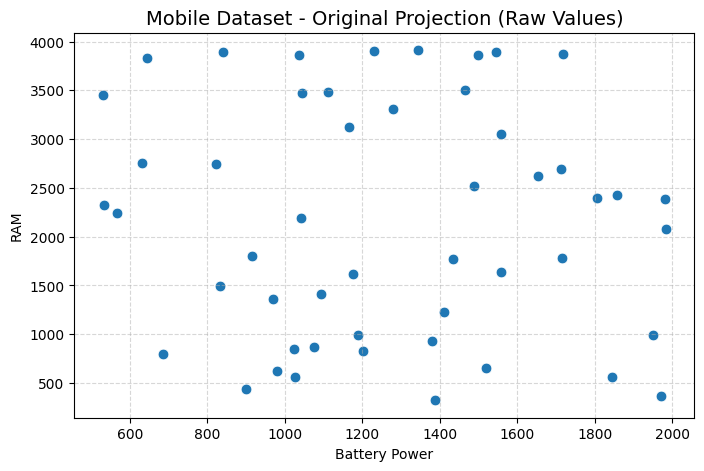

/tmp/ipython-input-4253168699.py:21: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



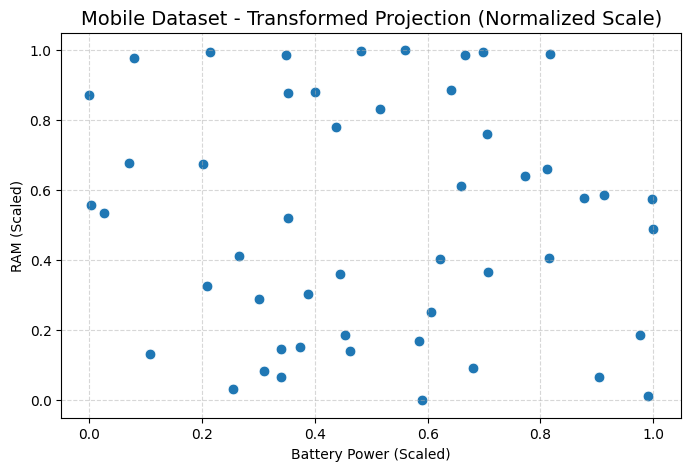

Average feature values:
battery_power    1266.56
ram              2154.22
int_memory         33.80
mobile_wt         142.52
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/content/test.csv").head(50)
print(df.head())
features = ["battery_power", "ram", "int_memory", "mobile_wt"]
plt.figure(figsize=(8,5))
sns.scatterplot(x="battery_power", y="ram", data=df, palette="viridis", s=60)
plt.title("Mobile Dataset - Original Projection (Raw Values)", fontsize=14)
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled, columns=features)


plt.figure(figsize=(8,5))
sns.scatterplot(x="battery_power", y="ram", data=df_scaled, palette="plasma", s=60)
plt.title("Mobile Dataset - Transformed Projection (Normalized Scale)", fontsize=14)
plt.xlabel("Battery Power (Scaled)")
plt.ylabel("RAM (Scaled)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
print("Average feature values:")
print(df[features].mean())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/test.csv")
print("Dataset shape:", data.shape)
print(data.head())
numeric_cols = ["battery_power", "ram", "int_memory", "mobile_wt"]
average_features = data[numeric_cols].mean()
print("\nAverage Mobile Features Across Dataset:")
print(average_features)

Dataset shape: (1000, 21)
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     

# Task-9

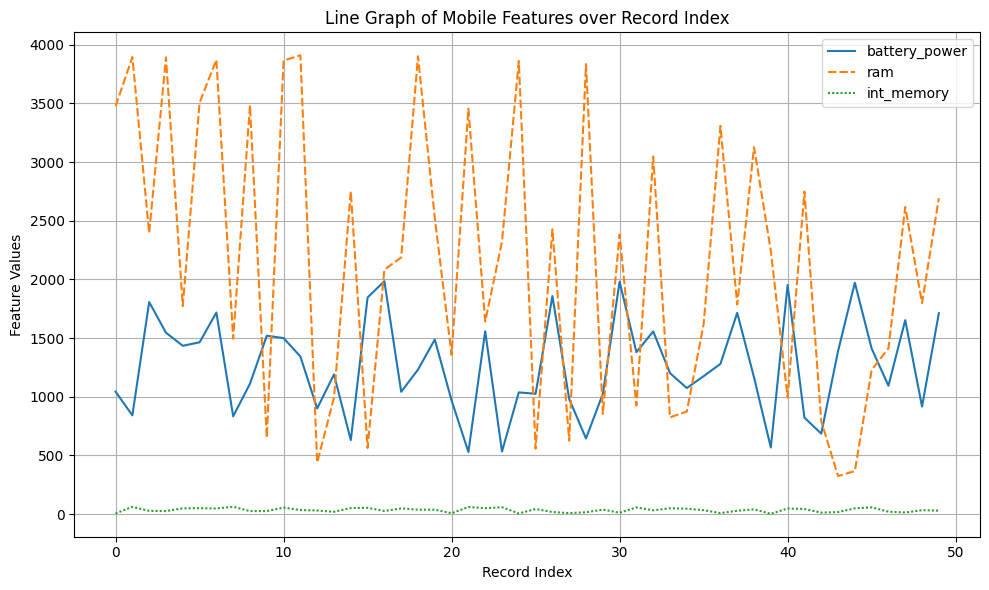

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/test.csv').head(50)
features = ['battery_power', 'ram', 'int_memory']
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[features])
plt.title('Line Graph of Mobile Features over Record Index')
plt.xlabel('Record Index')
plt.ylabel('Feature Values')
plt.grid(True)
plt.tight_layout()
plt.show()

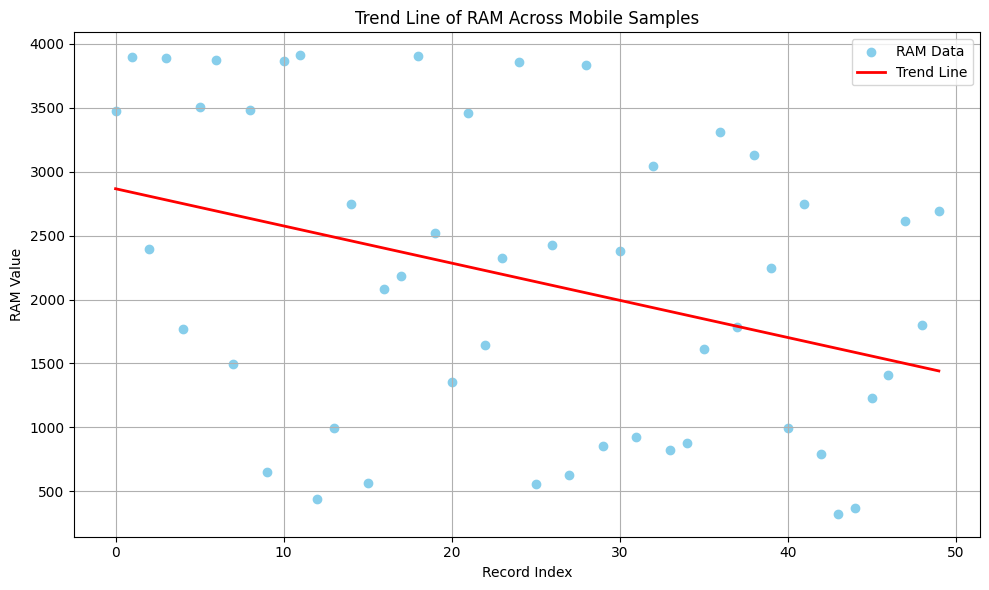

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('/content/test.csv').head(50)
feature = 'ram'
x = np.arange(len(data)).reshape(-1, 1)
y = data[feature].values
y = np.nan_to_num(y, nan=np.nanmean(y))
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='skyblue', label='RAM Data')
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Trend Line')
plt.title('Trend Line of RAM Across Mobile Samples')
plt.xlabel('Record Index')
plt.ylabel('RAM Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

    battery_power          ram  int_memory   mobile_wt
pc                                                    
0     1283.475000  1993.950000   36.575000  131.525000
1     1295.473684  2233.543860   33.578947  134.017544
2     1254.395349  2243.488372   36.953488  139.069767
3     1263.607843  2105.235294   33.019608  142.921569
4     1233.780488  2217.756098   31.951220  144.487805
5     1106.057692  2352.480769   31.384615  139.326923
6     1209.875000  2248.696429   32.607143  145.910714
7     1336.173077  2141.057692   31.461538  137.076923
8     1277.400000  2157.100000   28.825000  129.150000
9     1189.291667  2135.270833   33.854167  139.604167
10    1233.568182  2216.977273   31.977273  139.000000
11    1237.857143  2289.452381   36.523810  150.690476
12    1240.586957  1737.978261   32.065217  133.347826
13    1293.945946  2290.027027   32.324324  140.135135
14    1146.490909  2267.763636   33.109091  142.781818
15    1290.642857  2087.666667   37.119048  136.904762
16    1278

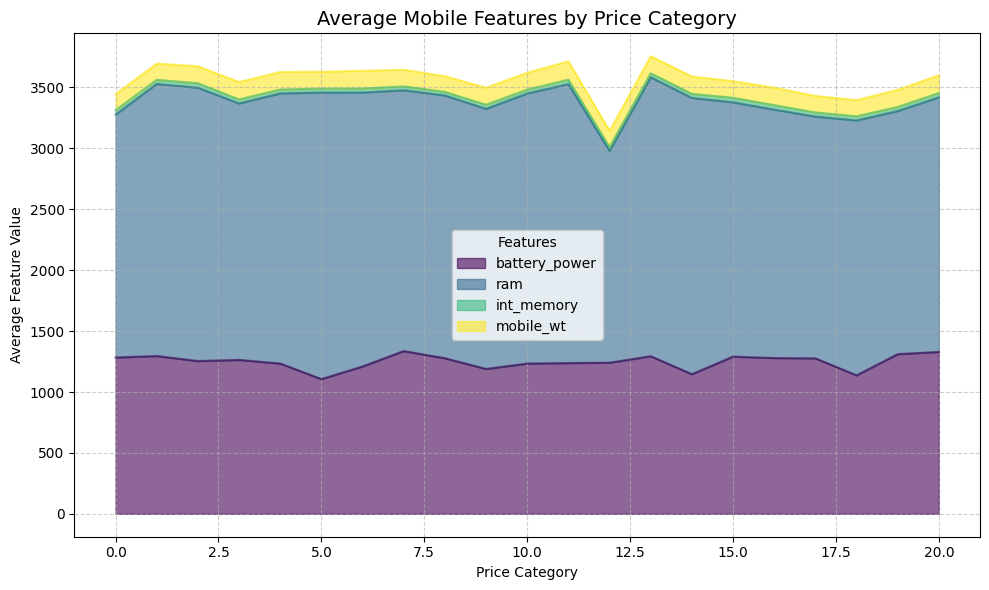

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/test.csv")
numeric_cols = ['battery_power', 'ram', 'int_memory', 'mobile_wt']
target_col = 'pc'
avg_by_price = data.groupby(target_col)[numeric_cols].mean()
print(avg_by_price)
avg_by_price.plot(kind='area', figsize=(10,6), alpha=0.6, cmap='viridis')
plt.title("Average Mobile Features by Price Category", fontsize=14)
plt.xlabel("Price Category")
plt.ylabel("Average Feature Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Features")
plt.tight_layout()
plt.show()